In [16]:
import torch
import numpy as np
import cvxpy as cp
from constants import linear_probe_dataset_path, linear_probe_weights
from datasets import load_from_disk, Dataset

LAYER = 33


In [2]:
new_ds = load_from_disk(linear_probe_dataset_path("gb1", LAYER, "sae"))
new_ds.shuffle(seed=42)

Dataset({
    features: ['protein', 'label', 'stage', 'latents'],
    num_rows: 149361
})

In [3]:
n_tot = 14940

In [4]:
idx = np.argsort(new_ds["label"][:])[::-1]

In [6]:
X_SZ = new_ds["latents"][idx[:n_tot]]
y_S = new_ds["label"][idx[:n_tot]]

In [7]:
non = X_SZ[X_SZ.nonzero()]
non.mean(), non.std()

(0.19896707, 0.8859355)

In [8]:
ones_S = np.ones(X_SZ.shape[0])
ones_SZ = ones_S[:, None]
X_SZ = np.concatenate([X_SZ, ones_SZ], axis=1)

In [18]:
# Split the dataset
sample_idx = np.random.permutation(n_tot)
n_train = int(n_tot * 0.8)
n_val = int(n_tot * 0.1)

Xtr, ytr = X_SZ[sample_idx[:n_train]], y_S[sample_idx[:n_train]]
Xva, yva = X_SZ[sample_idx[n_train:n_train + n_val]], y_S[sample_idx[n_train:n_train + n_val]]
Xte, yte = X_SZ[sample_idx[n_train + n_val:]], y_S[sample_idx[n_train + n_val:]]

print(len(Xtr), len(ytr), len(Xva), len (yva), len(Xte), len(yte))

11952 11952 1494 1494 1494 1494


In [ ]:
# # Define CVXPY problem
# d = X_SZ.shape[1]

# W = cp.Variable(d, nonneg=True)
# lam = cp.Parameter(nonneg=True)

# objective = cp.Minimize(
#     cp.sum_squares(Xtr @ W - ytr) + lam * cp.norm1(W) + 1e-6 * cp.sum_squares(W)
# )

# prob = cp.Problem(objective)


In [ ]:
# from tqdm import tqdm
# # Validation Loop
# lams = [0.0, 1e-4, 1e-3, 1e-2, 1e-1]
# best_lam, best_val = None, np.inf

# for l in tqdm(lams):
#     lam.value = l
#     prob.solve(
#         solver=cp.SCS,
#         verbose=True,
#         max_iters=3000,
#         eps=1e-4,
#         acceleration_lookback=0
#     )
#     # prob.solve(warm_start=True)

#     yhat_val = Xva @ W.value
#     val_err = np.mean((yhat_val - yva)**2)
#     print(val_err)

#     if val_err < best_val:
#         best_val = val_err
#         best_lam = l
# print(best_lam)

  0%|          | 0/5 [00:00<?, ?it/s](CVXPY) Jan 04 04:16:01 PM: Your problem has 4097 variables, 0 constraints, and 1 parameters.
(CVXPY) Jan 04 04:16:01 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 04 04:16:01 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 04 04:16:01 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 04 04:16:01 PM: Compiling problem (target solver=SCS).
(CVXPY) Jan 04 04:16:01 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 04 04:16:01 PM: Applying reduction Dcp2Cone
(CVXPY) Jan 04 04:16:01 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 04 04:16:01 PM: Applying reduction ConeMatrixStuffing


                                     CVXPY                                     
                                     v1.7.5                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------


  0%|          | 0/5 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# Xtv = np.vstack([Xtr, Xva])
# ytv = np.concatenate([ytr, yva])

# W = cp.Variable(d, nonneg=True)
# lam = cp.Parameter(nonneg=True)

# objective = cp.Minimize(
#     cp.sum_squares(Xtv @ W - ytv) + lam * cp.norm1(W) + 1e-6 * cp.sum_squares(W)
# )

# prob = cp.Problem(objective)

# lam.value = best_lam
# prob.solve(
#     solver=cp.SCS,
#     verbose=True,
#     max_iters=3000,
#     eps=1e-4,
#     acceleration_lookback=0
# )

# W_star = W.value

(CVXPY) Jan 04 03:43:00 PM: Your problem has 4097 variables, 0 constraints, and 1 parameters.
(CVXPY) Jan 04 03:43:00 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 04 03:43:00 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 04 03:43:00 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 04 03:43:00 PM: Compiling problem (target solver=SCS).
(CVXPY) Jan 04 03:43:00 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jan 04 03:43:00 PM: Applying reduction Dcp2Cone
(CVXPY) Jan 04 03:43:00 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 04 03:43:00 PM: Applying reduction ConeMatrixStuffing


                                     CVXPY                                     
                                     v1.7.5                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------


(CVXPY) Jan 04 03:43:03 PM: Applying reduction SCS
(CVXPY) Jan 04 03:43:06 PM: Finished problem compilation (took 6.226e+00 seconds).
(CVXPY) Jan 04 03:43:06 PM: (Subsequent compilations of this problem, using the same arguments, should take less time.)
(CVXPY) Jan 04 03:43:06 PM: Invoking solver SCS  to obtain a solution.


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.10 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 21640, constraints m: 25737
cones: 	  z: primal zero / dual free vars: 13446
	  l: linear vars: 12291
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 3000, normalize: 1, rho_x: 1.00e-06
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 19803517, nnz(P): 13446
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
-----------------------------------

(CVXPY) Jan 04 03:45:12 PM: Problem status: optimal_inaccurate
(CVXPY) Jan 04 03:45:12 PM: Optimal value: 6.755e+04
(CVXPY) Jan 04 03:45:12 PM: Compilation took 6.226e+00 seconds
(CVXPY) Jan 04 03:45:12 PM: Solver (including time spent in interface) took 1.256e+02 seconds


  3000| 7.13e-02  1.59e-03  6.33e-04  2.07e+03  1.00e-01  1.26e+02 
------------------------------------------------------------------
status:  solved (inaccurate - reached max_iters)
timings: total: 1.26e+02s = setup: 1.98e+01s + solve: 1.06e+02s
	 lin-sys: 1.02e+02s, cones: 1.42e-01s, accel: 0.00e+00s
------------------------------------------------------------------
objective = 2071.341630 (inaccurate)
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------


In [42]:
from sklearn.linear_model import Lasso
model = Lasso(
    alpha=0.00001,
    fit_intercept=False,
    max_iter=100,
    tol=1e-4,
)
model.fit(Xtr, ytr)
print(model.coef_, model.intercept_)
print(((model.predict(Xte) - yte) ** 2).mean())
print(np.argsort(model.coef_)[::-1][:10])
print(model.coef_[np.argsort(model.coef_)[::-1][:10]])

[-0.          0.          3.15295476 ...  0.2269241  -0.81512689
  0.0448103 ] 0.0
0.39891312333643103
[2382 2771 3123 1188 2545 3468  722 2480  252 1444]
[21.74540271 20.20539216 17.58153492 14.77409374 12.57220245 12.29749739
 11.46961862 10.89268801 10.24962477  9.60293078]


/data/anaconda3/envs/barsaelona_ishan/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.339e+03, tolerance: 1.950e+00
  model = cd_fast.enet_coordinate_descent(


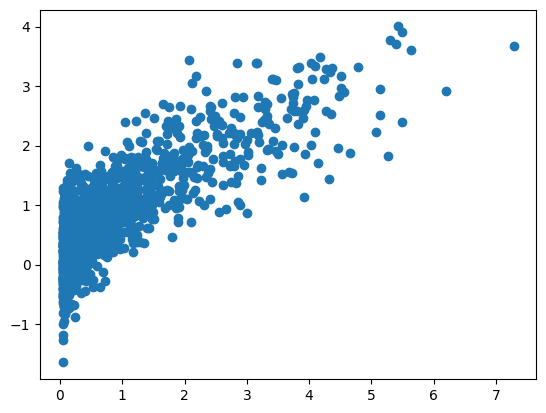

In [43]:
import matplotlib.pyplot as plt
errors = model.predict(Xte) - yte
plt.scatter(yte, model.predict(Xte))

In [44]:
from scipy.stats import spearmanr
print(spearmanr(yte, model.predict(Xte)))

SignificanceResult(statistic=0.7277563890009874, pvalue=1.2391713423157783e-246)


In [45]:
W = model.coef_
print("Test RMSE: ", np.sqrt(np.mean((Xte @ W - yte)**2)))

model_path = linear_probe_weights("gb1", LAYER, "sae")
torch.save(W, model_path)
print("Saved to: ", model_path)
print("Weight vector shape: ", W.shape)

Test RMSE:  0.6315956961034733
Saved to:  /data/ishan/barSAElona_GUIDEola/gb1_l33_sae_act.pt
Weight vector shape:  (4097,)
